In [1]:
#Import all relevant libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## Loading the data
*converts the CSV file into a Pandas dataframe.*

In [3]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('archive (21)/final_data.csv')

### *Viewing the dataframe*


In [4]:
df.shape

(10754, 22)

In [5]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [6]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

### *there is no null and this a little bit weird*.... we may check it later

In [7]:
df.value_counts()

player                                     team                    name                position                    height  age   appearance  goals     assists   yellow cards  second yellow cards  red cards  goals conceded  clean sheets  minutes played  days_injured  games_injured  award  current_value  highest_value  position_encoded  winger
/aaron-appindangoye/profil/spieler/254249  Sivasspor               Aaron Appindangoyé  Defender Centre-Back        184.0   31.0  35          0.067014  0.033507  0.067014      0.000000             0.000000   0.000000        0.000000      2686            436           74             1      750000         1800000        2                 0         1
/mohamed-bouchouari/profil/spieler/546225  FC Emmen                Mohamed Bouchouari  Defender Right-Back         170.0   22.0  34          0.076596  0.076596  0.114894      0.000000             0.000000   0.000000        0.000000      2350            6             1              0      500000         500

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [8]:
df.head(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


#### *lets see if there is outliers in prices*

In [9]:
prices=df['current_value']

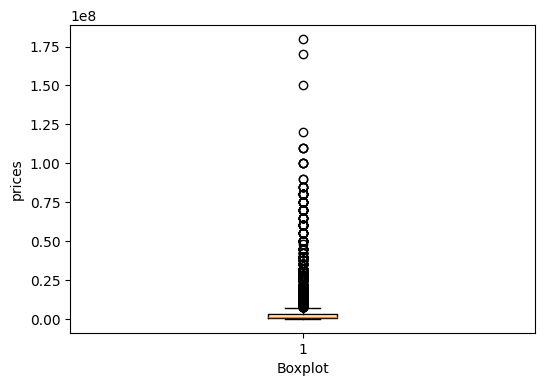

In [10]:
plt.figure(figsize=(6,4))
plt.boxplot(prices)
plt.xlabel('Boxplot')
plt.ylabel('prices')
plt.show()

In [11]:
prices.describe()

count    1.075400e+04
mean     3.622971e+06
std      9.095410e+06
min      0.000000e+00
25%      3.000000e+05
50%      8.000000e+05
75%      3.000000e+06
max      1.800000e+08
Name: current_value, dtype: float64

## **before we start let us change the unit of current price to more readable unit,**
## **so we will make it a Kilo unit**

In [12]:
df.rename(columns={'current_value':'current_value_K'}, inplace=True)

In [13]:
df['current_value_K']=df['current_value_K']

In [14]:
#df

### *clearly there is alot of outliers!!*
##### *the Quritles 1 2 and 3 prices are between 300K and 3M , then we have alot of values are above that until we reach 180 M*

### And when we search about the dataset, we find that its from :
##### *11 European leagues, England, Germany, Spain, Italy, France, Netherlands,Portugal, Russia, Turkey,Austria.*

##### *4 American leagues, Brazil, United States, Argentina, Mexico.*

##### *1 African league, South Africa.*

##### *4 Asian leagues, Japan, Saudi Arabia, South Korea, Australia.*

#### *so we assume that the differnces between regions markets may cause the outliers in prices*



#### *here we will categorize players based on their league and country;*
#### *so we need to categorize all teams*

In [15]:
#df['team'].unique()

In [16]:

team_region_mapping = {
    'Manchester United': 'Europe',
    'West Ham United': 'Europe',
    'Leicester City': 'Europe',
    'Aston Villa': 'Europe',
    'Wolverhampton Wanderers': 'Europe',
    'Southampton FC': 'Europe',
    'Brighton & Hove Albion': 'Europe',
    'Everton FC': 'Europe',
    'Nottingham Forest': 'Europe',
    'Leeds United': 'Europe',
    'Crystal Palace': 'Europe',
    'Fulham FC': 'Europe',
    'AFC Bournemouth': 'Europe',
    'Brentford FC': 'Europe',
    'Liverpool FC': 'Europe',
    'Newcastle United': 'Europe',
    'Manchester City': 'Europe',
    'Arsenal FC': 'Europe',
    'Tottenham Hotspur': 'Europe',
    'Chelsea FC': 'Europe',
    'Borussia Mönchengladbach': 'Europe',
    'VfL Wolfsburg': 'Europe',
    'TSG 1899 Hoffenheim': 'Europe',
    '1.FC Union Berlin': 'Europe',
    'FC Augsburg': 'Europe',
    'VfB Stuttgart': 'Europe',
    '1.FSV Mainz 05': 'Europe',
    '1.FC Köln': 'Europe',
    'Hertha BSC': 'Europe',
    'FC Schalke 04': 'Europe',
    'VfL Bochum': 'Europe',
    'SV Werder Bremen': 'Europe',
    'Eintracht Frankfurt': 'Europe',
    'SC Freiburg': 'Europe',
    'Borussia Dortmund': 'Europe',
    'Bayer 04 Leverkusen': 'Europe',
    'Bayern Munich': 'Europe',
    'RB Leipzig': 'Europe',
    'Real Sociedad': 'Europe',
    'Villarreal CF': 'Europe',
    'Real Betis Balompié': 'Europe',
    'Athletic Bilbao': 'Europe',
    'Valencia CF': 'Europe',
    'Sevilla FC': 'Europe',
    'Celta de Vigo': 'Europe',
    'CA Osasuna': 'Europe',
    'Girona FC': 'Europe',
    'Rayo Vallecano': 'Europe',
    'RCD Mallorca': 'Europe',
    'UD Almería': 'Europe',
    'Real Valladolid CF': 'Europe',
    'Cádiz CF': 'Europe',
    'Elche CF': 'Europe',
    'RCD Espanyol Barcelona': 'Europe',
    'Getafe CF': 'Europe',
    'Atlético de Madrid': 'Europe',
    'Real Madrid': 'Europe',
    'FC Barcelona': 'Europe',
    'AS Roma': 'Europe',
    'SS Lazio': 'Europe',
    'ACF Fiorentina': 'Europe',
    'US Sassuolo': 'Europe',
    'Torino FC': 'Europe',
    'Udinese Calcio': 'Europe',
    'Bologna FC 1909': 'Europe',
    'AC Monza': 'Europe',
    'FC Empoli': 'Europe',
    'US Lecce': 'Europe',
    'Spezia Calcio': 'Europe',
    'Hellas Verona': 'Europe',
    'UC Sampdoria': 'Europe',
    'US Cremonese': 'Europe',
    'US Salernitana 1919': 'Europe',
    'Atalanta BC': 'Europe',
    'SSC Napoli': 'Europe',
    'Inter Milan': 'Europe',
    'AC Milan': 'Europe',
    'Juventus FC': 'Europe',
    'AS Monaco': 'Europe',
    'Stade Rennais FC': 'Europe',
    'Olympique Marseille': 'Europe',
    'OGC Nice': 'Europe',
    'RC Lens': 'Europe',
    'FC Nantes': 'Europe',
    'Montpellier HSC': 'Europe',
    'FC Lorient': 'Europe',
    'FC Toulouse': 'Europe',
    'ESTAC Troyes': 'Europe',
    'Stade Brestois 29': 'Europe',
    'Angers SCO': 'Europe',
    'AJ Auxerre': 'Europe',
    'Clermont Foot 63': 'Europe',
    'AC Ajaccio': 'Europe',
    'Olympique Lyon': 'Europe',
    'LOSC Lille': 'Europe',
    'Stade Reims': 'Europe',
    'RC Strasbourg Alsace': 'Europe',
    'Paris Saint-Germain': 'Europe',
    'AZ Alkmaar': 'Europe',
    'Twente Enschede FC': 'Europe',
    'Vitesse Arnhem': 'Europe',
    'FC Groningen': 'Europe',
    'Fortuna Sittard': 'Europe',
    'NEC Nijmegen': 'Europe',
    'Sparta Rotterdam': 'Europe',
    'SC Cambuur Leeuwarden': 'Europe',
    'Excelsior Rotterdam': 'Europe',
    'FC Volendam': 'Europe',
    'RKC Waalwijk': 'Europe',
    'FC Emmen': 'Europe',
    'Go Ahead Eagles': 'Europe',
    'FC Utrecht': 'Europe',
    'SC Heerenveen': 'Europe',
    'Ajax Amsterdam': 'Europe',
    'PSV Eindhoven': 'Europe',
    'Feyenoord Rotterdam': 'Europe',
    'Dynamo Moscow': 'Europe',
    'Lokomotiv Moscow': 'Europe',
    'FK Rostov': 'Europe',
    'Krylya Sovetov Samara': 'Europe',
    'FC Sochi': 'Europe',
    'Akhmat Grozny': 'Europe',
    'Ural Yekaterinburg': 'Europe',
    'FK Orenburg': 'Europe',
    'FC Pari Nizhniy Novgorod': 'Europe',
    'FK Khimki': 'Europe',
    'Torpedo Moscow': 'Europe',
    'Fakel Voronezh': 'Europe',
    'Spartak Moscow': 'Europe',
    'CSKA Moscow': 'Europe',
    'FK Krasnodar': 'Europe',
    'Zenit St. Petersburg': 'Europe',
    'West Bromwich Albion': 'Europe',
    'Sunderland AFC': 'Europe',
    'Hull City': 'Europe',
    'Preston North End': 'Europe',
    'Stoke City': 'Europe',
    'Queens Park Rangers': 'Europe',
    'Birmingham City': 'Europe',
    'Cardiff City': 'Europe',
    'Millwall FC': 'Europe',
    'Reading FC': 'Europe',
    'Blackpool FC': 'Europe',
    'Bristol City': 'Europe',
    'Huddersfield Town': 'Europe',
    'Rotherham United': 'Europe',
    'Wigan Athletic': 'Europe',
    'Middlesbrough FC': 'Europe',
    'Coventry City': 'Europe',
    'Luton Town': 'Europe',
    'Swansea City': 'Europe',
    'Burnley FC': 'Europe',
    'Watford FC': 'Europe',
    'Sheffield United': 'Europe',
    'Blackburn Rovers': 'Europe',
    'Norwich City': 'Europe',
    'Trabzonspor': 'Europe',
    'Besiktas JK': 'Europe',
    'Basaksehir FK': 'Europe',
    'Antalyaspor': 'Europe',
    'Adana Demirspor': 'Europe',
    'Alanyaspor': 'Europe',
    'Kasimpasa': 'Europe',
    'Konyaspor': 'Europe',
    'MKE Ankaragücü': 'Europe',
    'Sivasspor': 'Europe',
    'Kayserispor': 'Europe',
    'Giresunspor': 'Europe',
    'Istanbulspor': 'Europe',
    'Hatayspor': 'Europe',
    'Gaziantep FK': 'Europe',
    'Fatih Karagümrük': 'Europe',
    'Ümraniyespor': 'Europe',
    'Fenerbahce': 'Europe',
    'Galatasaray': 'Europe',
    'SK Sturm Graz': 'Europe',
    'LASK': 'Europe',
    'SCR Altach': 'Europe',
    'SC Austria Lustenau': 'Europe',
    'SV Ried': 'Europe',
    'TSV Hartberg': 'Europe',
    'WSG Tirol': 'Europe',
    'Rapid Vienna': 'Europe',
    'Austria Vienna': 'Europe',
    'SK Austria Klagenfurt': 'Europe',
    'Wolfsberger AC': 'Europe',
    'Red Bull Salzburg': 'Europe',
    'Philadelphia Union': 'America',
    'FC Cincinnati': 'America',
    'FC Dallas': 'America',
    'Orlando City SC': 'America',
    'Los Angeles Galaxy': 'America',
    'New England Revolution': 'America',
    'D.C. United': 'America',
    'New York Red Bulls': 'America',
    'Portland Timbers': 'America',
    'Columbus Crew': 'America',
    'Charlotte FC': 'America',
    'Sporting Kansas City': 'America',
    'Colorado Rapids': 'America',
    'Vancouver Whitecaps FC': 'America',
    'Chicago Fire FC': 'America',
    'Inter Miami CF': 'America',
    'Minnesota United FC': 'America',
    'Houston Dynamo FC': 'America',
    'St. Louis CITY SC': 'America',
    'CF Montréal': 'America',
    'Real Salt Lake City': 'America',
    'Nashville SC': 'America',
    'San Jose Earthquakes': 'America',
    'Seattle Sounders FC': 'America',
    'Atlanta United FC': 'America',
    'New York City FC': 'America',
    'Austin FC': 'America',
    'Los Angeles FC': 'America',
    'Toronto FC': 'America',
    'CA Vélez Sarsfield': 'America',
    'CA San Lorenzo de Almagro': 'America',
    'Club Atlético Lanús': 'America',
    'Defensa y Justicia': 'America',
    'Club Estudiantes de La Plata': 'America',
    "CA Newell's Old Boys": 'America',
    'CA Colon': 'America',
    'CA Rosario Central': 'America',
    'CA Banfield': 'America',
    'Club de Gimnasia y Esgrima La Plata': 'America',
    'Club Atlético Tucumán': 'America',
    'CD Godoy Cruz Antonio Tomba': 'America',
    'Club Atlético Unión': 'America',
    'Club Atlético Platense': 'America',
    'Instituto AC Córdoba': 'America',
    'CA Sarmiento (Junin)': 'America',
    'CA Central Córdoba (SdE)': 'America',
    'CA Barracas Central': 'America',
    'Arsenal Fútbol Club': 'America',
    'Club Atlético Talleres': 'America',
    'Club Atlético Belgrano': 'America',
    'AA Argentinos Juniors': 'America',
    'CA Independiente': 'America',
    'Club Atlético Tigre': 'America',
    'CA River Plate': 'America',
    'CA Boca Juniors': 'America',
    'CA Huracán': 'America',
    'Racing Club': 'America',
    'Club Athletico Paranaense': 'America',
    'Red Bull Bragantino': 'America',
    'Santos FC': 'America',
    'Clube de Regatas Vasco da Gama': 'America',
    'Fluminense Football Club': 'America',
    'Sport Club Internacional': 'America',
    'Esporte Clube Bahia': 'America',
    'Grêmio Foot-Ball Porto Alegrense': 'America',
    'Coritiba Foot Ball Club': 'America',
    'Fortaleza Esporte Clube': 'America',
    'Cruzeiro Esporte Clube': 'America',
    'Goiás Esporte Clube': 'America',
    'Cuiabá Esporte Clube (MT)': 'America',
    'Botafogo de Futebol e Regatas': 'America',
    'Clube Atlético Mineiro': 'America',
    'São Paulo Futebol Clube': 'America',
    'América Futebol Clube (MG)': 'America',
    'Sociedade Esportiva Palmeiras': 'America',
    'CR Flamengo': 'America',
    'Sport Club Corinthians Paulista': 'America',
    'Santos Laguna': 'America',
    'Club León FC': 'America',
    'FC Juárez': 'America',
    'Club Tijuana': 'America',
    'Atlético de San Luis': 'America',
    'Club Necaxa': 'America',
    'Puebla FC': 'America',
    'Mazatlán FC': 'America',
    'Querétaro FC': 'America',
    'CF América': 'America',
    'CF Monterrey': 'America',
    'Atlas Guadalajara': 'America',
    'UNAM Pumas': 'America',
    'Deportivo Toluca': 'America',
    'Tigres UANL': 'America',
    'Deportivo Guadalajara': 'America',
    'CD Cruz Azul': 'America',
    'CF Pachuca': 'America',
    'Kawasaki Frontale': 'Asia',
    'Yokohama F. Marinos': 'Asia',
    'Cerezo Osaka': 'Asia',
    'Kyoto Sanga': 'Asia',
    'FC Tokyo': 'Asia',
    'Nagoya Grampus': 'Asia',
    'Kashiwa Reysol': 'Asia',
    'Yokohama FC': 'Asia',
    'Avispa Fukuoka': 'Asia',
    'Sagan Tosu': 'Asia',
    'Vissel Kobe': 'Asia',
    'Hokkaido Consadole Sapporo': 'Asia',
    'Shonan Bellmare': 'Asia',
    'Albirex Niigata': 'Asia',
    'Kashima Antlers': 'Asia',
    'Sanfrecce Hiroshima': 'Asia',
    'Urawa Red Diamonds': 'Asia',
    'Gamba Osaka': 'Asia',
    'Al-Shabab Club (Riyadh)': 'Asia',
    'Ettifaq FC': 'Asia',
    'Al-Taawoun FC': 'Asia',
    'Al-Wehda FC': 'Asia',
    'Damac FC': 'Asia',
    'Al-Tai': 'Asia',
    'Al-Fayha FC': 'Asia',
    'Abha Club': 'Asia',
    'Al-Khaleej': 'Asia',
    'Al-Raed SFC': 'Asia',
    'Al-Batin FC': 'Asia',
    'Al-Adalah FC': 'Asia',
    'Al-Ittihad Club (Jeddah)': 'Asia',
    'Al-Fateh SC': 'Asia',
    'Al-Hilal Saudi FC': 'Asia',
    'Al-Nassr FC': 'Asia',
    'Suwon Samsung Bluewings': 'Asia',
    'Jeju United': 'Asia',
    'Incheon United': 'Asia',
    'Gangwon FC': 'Asia',
    'Daejeon Hana Citizen': 'Asia',
    'Gwangju FC': 'Asia',
    'Daegu FC': 'Asia',
    'Suwon FC': 'Asia',
    'Pohang Steelers': 'Asia',
    'FC Seoul': 'Asia',
    'Jeonbuk Hyundai Motors': 'Asia',
    'Ulsan Hyundai': 'Asia',
    'Sekhukhune United FC': 'Africa',
    'AmaZulu FC': 'Africa',
    'Lamontville Golden Arrows': 'Africa',
    'Stellenbosch FC': 'Africa',
    'Swallows FC': 'Africa',
    'Maritzburg United FC': 'Africa',
    'Royal AM FC': 'Africa',
    'TS Galaxy FC': 'Africa',
    'Richards Bay FC': 'Africa',
    'Marumo Gallants FC': 'Africa',
    'Cape Town City FC': 'Africa',
    'Orlando Pirates': 'Africa',
    'SuperSport United': 'Africa',
    'Chippa United': 'Africa',
    'Mamelodi Sundowns FC': 'Africa',
    'Kaizer Chiefs': 'Africa',
    'Melbourne Victory': 'Asia',
    'Western United FC': 'Asia',
    'Newcastle United Jets': 'Asia',
    'Perth Glory': 'Asia',
    'Macarthur FC': 'Asia',
    'Brisbane Roar': 'Asia',
    'Central Coast Mariners': 'Asia',
    'Wellington Phoenix': 'Asia',
    'Melbourne City FC': 'Asia',
    'Sydney FC': 'Asia',
    'Adelaide United': 'Asia',
    'Western Sydney Wanderers': 'Asia',
}


df['region']=df['team'].map(team_region_mapping)




In [17]:
# df.drop('Region', axis=1, inplace=True)

In [18]:
df.head(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value_K,highest_value,position_encoded,winger,region
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,0.335463,9390,42,5,13,15000000,70000000,1,0,Europe


#### *Now lets check the outliers in each region ;) ......*

In [20]:
plt.figure(figsize=(3,3))
plt.boxplot(afr['current_value_K'])
plt.xlabel('Boxplot africa')
plt.ylabel('prices')

plt.boxplot(asia['current_value_K'])
plt.xlabel('Boxplot asia')
plt.ylabel('prices')

plt.boxplot(amr['current_value_K'])
plt.xlabel('Boxplot africa')
plt.ylabel('prices')

plt.boxplot(eur['current_value_K'])
plt.xlabel('Boxplot africa')
plt.ylabel('prices')

plt.show()

NameError: name 'afr' is not defined

<Figure size 300x300 with 0 Axes>

In [30]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value_K', 'highest_value',
       'position_encoded', 'winger', 'region_Africa', 'region_America',
       'region_Asia', 'region_Europe'],
      dtype='object')

In [36]:
df['position_encoded'].unique()

array([1, 2, 3, 4], dtype=int64)

In [22]:
# categorical_features = df['region']
df = pd.get_dummies(df, columns=['region'])

In [ ]:
df=pd.get_dummies(df, columns=[[]])

In [27]:
df[['region_Africa','region_America','region_Asia','region_Europe']]=df[['region_Africa','region_America','region_Asia','region_Europe']].astype(int)

In [ ]:
def isexpiensve(i):
    if i in

## now we can see the outliers clearly
#### *check the statics for each below: *

# **now we will create 4 models** 

In [ ]:
asia.shape

(1908, 22)

In [ ]:
from sklearn.model_selection import train_test_split
x = asia[['age','minutes played']]
y= asia['current_value_K']
print("Missing values in features:", x.isnull().sum())
print("Missing values in target:", y.isnull().sum())
# x = x.dropna()
# y = y.loc[x.index] 
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=100)
ridge_model = Ridge()  # You can adjust alpha to see different resu
lasso_model = Lasso()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Missing values in features: age               0
minutes played    0
dtype: int64
Missing values in target: 0


In [ ]:
from sklearn.linear_model import LinearRegression
asi = LinearRegression()
asi.fit(X_train,y_train)


LinearRegression()

In [ ]:
coeff = pd.DataFrame(asi.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,15.802947
1,0.116546


In [ ]:
print( 'intersepts= ' , asi.intercept_)

intersepts=  -175.8802893008542


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_base = [y_train.mean()] * len(y_test)
mse_base = mean_absolute_error(y_test, y_base )
y_pred = asi.predict(X_test)
mse_train = mean_squared_error(y_train, asi.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, asi.predict(X_train))
ae_train = mean_absolute_error(y_train, asi.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute  Error of base model: {mse_base}')
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute  Error of base model: 312.4840023269342
Mean Absolute Error for training: 258.1217670008115
Mean Absolute Error for testing: 264.7180116628588


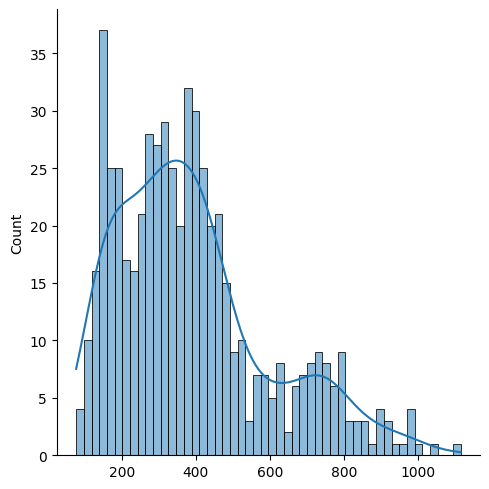

In [ ]:
sns.displot((y_pred),bins=50,kde=True)

In [ ]:
# r2_score_train = r2_score(y_train, asi.predict(X_train_scaled))
# r2_score_test = r2_score(y_test, y_pred)
# print(f'R Square for training: {r2_score_train}')
# print(f'R Square for testing: {r2_score_test}')

In [ ]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [ ]:
asi.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [ ]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 3e-07, 0.0002, 0.001, 0.01, 0.5, 1, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
grid_search_lasso.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 3e-07, 0.0002, 0.001, 0.01, 0.5, 1, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
r2_score_train = r2_score(y_train, asi.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.20154167729576677
R Square for testing: 0.25203186773043196


## **now for africa**

In [ ]:
afr.shape

(530, 22)

In [ ]:
# from sklearn.model_selection import train_test_split
# x = afr[['age','minutes played']]
# y= afr['current_value_K']
# print("Missing values in features:", x.isnull().sum())
# print("Missing values in target:", y.isnull().sum())

# # # Drop rows with any missing values
# # x = x.dropna()
# # y = y.loc[x.index] 
# X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=100)
# from sklearn.linear_model import LinearRegression
# af = LinearRegression()
# af.fit(X_train,y_train)


In [ ]:
# coeff = pd.DataFrame(af.coef_,columns=['Coefficient'])
# coeff

In [ ]:
# print( 'intersepts= ' , af.intercept_)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# y_base = [y_train.mean()] * len(y_test)
# mse_base = mean_absolute_error(y_test, y_base )
# y_pred = af.predict(X_test)
# mse_train = mean_squared_error(y_train, af.predict(X_train))
# mse_test = mean_squared_error(y_test, y_pred)
# mae_train = mean_absolute_error(y_train, af.predict(X_train))
# ae_train = mean_absolute_error(y_train, af.predict(X_train))
# mae_test = mean_absolute_error(y_test, y_pred)
# print(f'Mean Absolute  Error of base model: {mse_base}')
# print(f'Mean Absolute Error for training: {mae_train}')
# print(f'Mean Absolute Error for testing: {mae_test}')

In [ ]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)



# r2_score_train = r2_score(y_train, af.predict(X_train_scaled))
# r2_score_test = r2_score(y_test, y_pred)
# print(f'R Square for training: {r2_score_train}')
# print(f'R Square for testing: {r2_score_test}')

In [ ]:
# sns.displot((y_pred),bins=50,kde=True)

## *now lets create model for amiraca*

In [ ]:
# amr.shape

In [ ]:
# from sklearn.model_selection import train_test_split
# x = amr[['age','minutes played']]
# y= amr['current_value_K']
# print("Missing values in features:", x.isnull().sum())
# print("Missing values in target:", y.isnull().sum())

# # # Drop rows with any missing values
# # x = x.dropna()
# # y = y.loc[x.index] 
# X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=100)
# from sklearn.linear_model import LinearRegression
# am = LinearRegression()
# am.fit(X_train,y_train)

In [ ]:
# coeff = pd.DataFrame(am.coef_,columns=['Coefficient'])
# coeff

In [ ]:
# print( 'intersepts= ' , am.intercept_)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# y_base = [y_train.mean()] * len(y_test)
# mse_base = mean_absolute_error(y_test, y_base )
# y_pred = am.predict(X_test)
# mse_train = mean_squared_error(y_train, am.predict(X_train))
# mse_test = mean_squared_error(y_test, y_pred)
# mae_train = mean_absolute_error(y_train, am.predict(X_train))
# ae_train = mean_absolute_error(y_train, am.predict(X_train))
# mae_test = mean_absolute_error(y_test, y_pred)
# print(f'Mean Absolute  Error of base model: {mse_base}')
# print(f'Mean Absolute Error for training: {mae_train}')
# print(f'Mean Absolute Error for testing: {mae_test}')

In [ ]:
# sns.displot((y_pred),bins=50,kde=True)

## **now lets create the last model for europ:**

In [ ]:
eur.shape

(4962, 22)

In [ ]:
from sklearn.model_selection import train_test_split
x = eur[['age','minutes played']]
y= eur['current_value_K']
print("Missing values in features:", x.isnull().sum())
print("Missing values in target:", y.isnull().sum())

# # Drop rows with any missing values
# x = x.dropna()
# y = y.loc[x.index] 
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.4, random_state=500)
from sklearn.linear_model import LinearRegression
eu = LinearRegression()
eu.fit(X_train,y_train)

Missing values in features: age               0
minutes played    0
dtype: int64
Missing values in target: 0


LinearRegression()

In [ ]:
coeff = pd.DataFrame(eu.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,-89.586114
1,0.728205


In [ ]:
print( 'intersepts= ' , eu.intercept_)

intersepts=  2736.6490089171284


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_base = [y_train.mean()] * len(y_test)
mse_base = mean_absolute_error(y_test, y_base )
y_pred = eu.predict(X_test)
mse_train = mean_squared_error(y_train, eu.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, eu.predict(X_train))
ae_train = mean_absolute_error(y_train, eu.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute  Error of base model: {mse_base}')
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute  Error of base model: 2583.4330708394928
Mean Absolute Error for training: 2408.308276930749
Mean Absolute Error for testing: 2337.1632659986853


In [ ]:

# sns.displot((y_pred),bins=50,kde=True)

In [ ]:
# r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
# r2_score_test = r2_score(y_test, y_pred)
# print(f'R Square for training: {r2_score_train}')
# print(f'R Square for testing: {r2_score_test}')

# *lets stop here and let the rest for future works...*
# *Thanks*